# QDrift

In [1]:
from trotter.hamsimtrotter import AlgorithmHamSimTrotter
from qDrift.hamsimqDrift import AlgorithmHamSimqDrift
from pytket.pauli import Pauli, QubitPauliString
from pytket.utils import QubitPauliOperator
from pytket.circuit import Circuit,Qubit,fresh_symbol

from utils.func import calculate_error

from copy import copy, deepcopy
from tqdm import tqdm
import numpy as np

In [2]:
def gen_sys_param(n=10):
    global t_max
    global precision
    global initial_state_circ
    global t
    global hamiltonian
    global hamiltonian_drift
    global coeff
    global measurements
    global hamiltonian_test
    global h_test
    global coeff_test
    global Heisenberg
    global Heisenberg_d
    global Heisenberg_c
    global H3

    t_max=2
    precision = 10**(-4)
    initial_state_circ = Circuit(n)
    for i in range(n):
        initial_state_circ.H(i)

    # Heisenberg_d = ['ZZII','IZZI','IIZZ','ZIIZ','XXII','IXXI','IIXX','XIIX','YYII','IYYI','IIYY','YIIY','ZIII','IZII','IIZI','IIIZ'] 
    # Heisenberg_c = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    # hamiltonian_drift = ['ZIII','YZXX','XXII']
    # h_test = ['ZXII']
    # coeff_test = [0.2]
    # coeff = [0.1,0.4,0.2]

    measurements = [QubitPauliOperator({QubitPauliString([Qubit(i)], [Pauli.Z]): 1}) for i in range(initial_state_circ.n_qubits)]

In [3]:
# gen_sys_param()
# n_qdrift_steps = 100
# drift_time_evolution = AlgorithmHamSimqDrift(initial_state_circ,Heisenberg_d,Heisenberg_c,Heisenberg[0],t_max,n_qdrift_steps,t)
# drift_time_evolution.Drift_exp()
# trotter_time_evolution_cheat = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_qdrift_steps,t)
# trotter_time_evolution_cheat._trotter_step_cheat(exps='Energy')
# drift_time_evolution.execute(list(trotter_time_evolution_cheat._real_measurement.values()), color='purple')

In [4]:
# gen_sys_param()
# error = 1
# n_qdrift_steps = 3
# while error > 1e-4:
#     U_sims = []
#     gen_sys_param()
#     time_evolution = AlgorithmHamSimqDrift(initial_state_circ,Heisenberg_d,Heisenberg_c,Heisenberg[0],t_max,n_qdrift_steps,t)
#     time_evolution.Drift_exp()
#     U_sim = time_evolution.execute()
#     U_sims.append(U_sim)
#     trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_qdrift_steps,t)
#     U = trotter_time_evolution.execute(color='green', cheat=False, plot=False)
#     error = calculate_error(U_sims, U)
#     print('step:',n_qdrift_steps,'error:',error)
#     if error < precision:
#         print('Congratulations!')
#     n_qdrift_steps *= 10

'''
step: 3 error: 1.8507102429864286
step: 30 error: 1.749055560834051
step: 300 error: 1.300882374374903
step: 3000 error: 0.7472272607324455
step: 30000 error: 0.1812082026023719
step: 300000 error: 0.059744391798576615
'''

'\nstep: 3 error: 1.8507102429864286\nstep: 30 error: 1.749055560834051\nstep: 300 error: 1.300882374374903\nstep: 3000 error: 0.7472272607324455\nstep: 30000 error: 0.1812082026023719\nstep: 300000 error: 0.059744391798576615\n'

# Term grouping

In [5]:
input_hamiltonian = """
+ 0.003034656830204855 * IIIYYIIIYY 

+ 0.003034656830204855 * IIIXXIIIYY

+ 0.003034656830204855 * IIIYYIIIXX

+ 0.003034656830204855 * IIIXXIIIXX

- 0.008373361424264817 * YZZZYIIIYY

- 0.008373361424264817 * XZZZXIIIYY

- 0.008373361424264817 * YZZZYIIIXX

- 0.008373361424264817 * XZZZXIIIXX

+ 0.00211113766859809 * YZZYIIIIYY

+ 0.00211113766859809 * XZZXIIIIYY

+ 0.00211113766859809 * YZZYIIIIXX

+ 0.00211113766859809 * XZZXIIIIXX

- 0.00491756976241806 * IIIIIIIIYY

- 0.00491756976241806 * IIIIIIIIXX

+ 0.010540187409026488 * ZIIIIIIIYY

+ 0.010540187409026488 * ZIIIIIIIXX

- 0.0011822832324725804 * IZIIIIIIYY

- 0.0011822832324725804 * IZIIIIIIXX

- 0.0011822832324725804 * IIZIIIIIYY

- 0.0011822832324725804 * IIZIIIIIXX

- 0.00154067008970742 * IIIZIIIIYY

- 0.00154067008970742 * IIIZIIIIXX

+ 0.011733623912074194 * IIIIZIIIYY

+ 0.011733623912074194 * IIIIZIIIXX

+ 0.0027757462269049522 * IIIIIZIIYY

+ 0.0027757462269049522 * IIIIIZIIXX

+ 0.0036202487558837123 * IIIIIIZIYY

+ 0.0036202487558837123 * IIIIIIZIXX

+ 0.0036202487558837123 * IIIIIIIZYY

+ 0.0036202487558837123 * IIIIIIIZXX

+ 0.005996760849734561 * IIYZYIIYZY

+ 0.005996760849734561 * IIXZXIIYZY

+ 0.005996760849734561 * IIYZYIIXZX

+ 0.005996760849734561 * IIXZXIIXZX

+ 0.004802531988356293 * IIYYIIIYZY

+ 0.004802531988356293 * IIXXIIIYZY

+ 0.004802531988356293 * IIYYIIIXZX

+ 0.004802531988356293 * IIXXIIIXZX

- 0.004879740484191497 * YZYIIIIYZY

- 0.004879740484191497 * XZXIIIIYZY

- 0.004879740484191497 * YZYIIIIXZX

- 0.004879740484191497 * XZXIIIIXZX

+ 0.005996760849734561 * IYZZYIYZZY

+ 0.005996760849734561 * IXZZXIYZZY

+ 0.005996760849734561 * IYZZYIXZZX

+ 0.005996760849734561 * IXZZXIXZZX

+ 0.004802531988356293 * IYZYIIYZZY

+ 0.004802531988356293 * IXZXIIYZZY

+ 0.004802531988356293 * IYZYIIXZZX

+ 0.004802531988356293 * IXZXIIXZZX

- 0.004879740484191497 * YYIIIIYZZY

- 0.004879740484191497 * XXIIIIYZZY

- 0.004879740484191497 * YYIIIIXZZX

- 0.004879740484191497 * XXIIIIXZZX

- 0.008373361424264817 * IIIYYYZZZY

- 0.008373361424264817 * IIIXXYZZZY

- 0.008373361424264817 * IIIYYXZZZX

- 0.008373361424264817 * IIIXXXZZZX

+ 0.0307383271773138 * YZZZYYZZZY

+ 0.0307383271773138 * XZZZXYZZZY

+ 0.0307383271773138 * YZZZYXZZZX

+ 0.0307383271773138 * XZZZXXZZZX

- 0.0077644411821215335 * YZZYIYZZZY

- 0.0077644411821215335 * XZZXIYZZZY

- 0.0077644411821215335 * YZZYIXZZZX

- 0.0077644411821215335 * XZZXIXZZZX

- 0.005949019975734247 * IIIIIYZZZY

- 0.005949019975734247 * IIIIIXZZZX

- 0.0351167704024114 * ZIIIIYZZZY

- 0.0351167704024114 * ZIIIIXZZZX

+ 0.0027298828353264134 * IZIIIYZZZY

+ 0.0027298828353264134 * IZIIIXZZZX

+ 0.0027298828353264134 * IIZIIYZZZY

+ 0.0027298828353264134 * IIZIIXZZZX

+ 0.0023679368995844726 * IIIZIYZZZY

+ 0.0023679368995844726 * IIIZIXZZZX

- 0.03305872858775587 * IIIIZYZZZY

- 0.03305872858775587 * IIIIZXZZZX

- 0.0021498576488650843 * IIIIIYIZZY

- 0.0021498576488650843 * IIIIIXIZZX

- 0.0021498576488650843 * IIIIIYZIZY

- 0.0021498576488650843 * IIIIIXZIZX

+ 0.004479074568182561 * IIIIIYZZIY

+ 0.004479074568182561 * IIIIIXZZIX

+ 0.004802531988356293 * IIYZYIIYYI

+ 0.004802531988356293 * IIXZXIIYYI

+ 0.004802531988356293 * IIYZYIIXXI

+ 0.004802531988356293 * IIXZXIIXXI

+ 0.010328819322301622 * IIYYIIIYYI

+ 0.010328819322301622 * IIXXIIIYYI

+ 0.010328819322301622 * IIYYIIIXXI

+ 0.010328819322301622 * IIXXIIIXXI

- 0.003466391848475337 * YZYIIIIYYI

- 0.003466391848475337 * XZXIIIIYYI

- 0.003466391848475337 * YZYIIIIXXI

- 0.003466391848475337 * XZXIIIIXXI

+ 0.004802531988356293 * IYZZYIYZYI

+ 0.004802531988356293 * IXZZXIYZYI

+ 0.004802531988356293 * IYZZYIXZXI

+ 0.004802531988356293 * IXZZXIXZXI

+ 0.010328819322301622 * IYZYIIYZYI

+ 0.010328819322301622 * IXZXIIYZYI

+ 0.010328819322301622 * IYZYIIXZXI

+ 0.010328819322301622 * IXZXIIXZXI

- 0.003466391848475337 * YYIIIIYZYI

- 0.003466391848475337 * XXIIIIYZYI

- 0.003466391848475337 * YYIIIIXZXI

- 0.003466391848475337 * XXIIIIXZXI

+ 0.00211113766859809 * IIIYYYZZYI

+ 0.00211113766859809 * IIIXXYZZYI

+ 0.00211113766859809 * IIIYYXZZXI

+ 0.00211113766859809 * IIIXXXZZXI

- 0.0077644411821215335 * YZZZYYZZYI

- 0.0077644411821215335 * XZZZXYZZYI

- 0.0077644411821215335 * YZZZYXZZXI

- 0.0077644411821215335 * XZZZXXZZXI

+ 0.006575744899182541 * YZZYIYZZYI

+ 0.006575744899182541 * XZZXIYZZYI

+ 0.006575744899182541 * YZZYIXZZXI

+ 0.006575744899182541 * XZZXIXZZXI

+ 0.023557442395837284 * IIIIIYZZYI

+ 0.023557442395837284 * IIIIIXZZXI

+ 0.010889407716094479 * ZIIIIYZZYI

+ 0.010889407716094479 * ZIIIIXZZXI

- 0.0003518893528389501 * IZIIIYZZYI

- 0.0003518893528389501 * IZIIIXZZXI

- 0.0003518893528389501 * IIZIIYZZYI

- 0.0003518893528389501 * IIZIIXZZXI

- 0.00901204279263803 * IIIZIYZZYI

- 0.00901204279263803 * IIIZIXZZXI

+ 0.0127339139792953 * IIIIZYZZYI

+ 0.0127339139792953 * IIIIZXZZXI

- 0.003818281201314288 * IIIIIYIZYI

- 0.003818281201314288 * IIIIIXIZXI

- 0.003818281201314288 * IIIIIYZIYI

- 0.003818281201314288 * IIIIIXZIXI

+ 0.004217284878422759 * IYYIIIYYII

+ 0.004217284878422759 * IXXIIIYYII

+ 0.004217284878422759 * IYYIIIXXII

+ 0.004217284878422759 * IXXIIIXXII

- 0.004879740484191498 * IIYZYYZYII

- 0.004879740484191498 * IIXZXYZYII

- 0.004879740484191498 * IIYZYXZXII

- 0.004879740484191498 * IIXZXXZXII

- 0.003466391848475337 * IIYYIYZYII

- 0.003466391848475337 * IIXXIYZYII

- 0.003466391848475337 * IIYYIXZXII

- 0.003466391848475337 * IIXXIXZXII

+ 0.004868302545087521 * YZYIIYZYII

+ 0.004868302545087521 * XZXIIYZYII

+ 0.004868302545087521 * YZYIIXZXII

+ 0.004868302545087521 * XZXIIXZXII

- 0.004879740484191498 * IYZZYYYIII

- 0.004879740484191498 * IXZZXYYIII

- 0.004879740484191498 * IYZZYXXIII

- 0.004879740484191498 * IXZZXXXIII

- 0.003466391848475337 * IYZYIYYIII

- 0.003466391848475337 * IXZXIYYIII

- 0.003466391848475337 * IYZYIXXIII

- 0.003466391848475337 * IXZXIXXIII

+ 0.004868302545087521 * YYIIIYYIII

+ 0.004868302545087521 * XXIIIYYIII

+ 0.004868302545087521 * YYIIIXXIII

+ 0.004868302545087521 * XXIIIXXIII

- 0.004917569762418068 * IIIYYIIIII

- 0.004917569762418068 * IIIXXIIIII

+ 0.0027757462269049522 * ZIIYYIIIII

+ 0.0027757462269049522 * ZIIXXIIIII

+ 0.0036202487558837123 * IZIYYIIIII

+ 0.0036202487558837123 * IZIXXIIIII

+ 0.0036202487558837123 * IIZYYIIIII

+ 0.0036202487558837123 * IIZXXIIIII

- 0.005949019975734285 * YZZZYIIIII

- 0.005949019975734285 * XZZZXIIIII

- 0.0021498576488650843 * YIZZYIIIII

- 0.0021498576488650843 * XIZZXIIIII

- 0.0021498576488650843 * YZIZYIIIII

- 0.0021498576488650843 * XZIZXIIIII

+ 0.004479074568182561 * YZZIYIIIII

+ 0.004479074568182561 * XZZIXIIIII

+ 0.02355744239583729 * YZZYIIIIII

+ 0.02355744239583729 * XZZXIIIIII

- 0.003818281201314288 * YIZYIIIIII

- 0.003818281201314288 * XIZXIIIIII

- 0.003818281201314288 * YZIYIIIIII

- 0.003818281201314288 * XZIXIIIIII

+ 1.0709274663656798 * IIIIIIIIII

- 0.5772920990654371 * ZIIIIIIIII

- 0.4244817531727133 * IZIIIIIIII

+ 0.06245512523136934 * ZZIIIIIIII

- 0.4244817531727134 * IIZIIIIIII

+ 0.06245512523136934 * ZIZIIIIIII

+ 0.06558452315458405 * IZZIIIIIII

- 0.3899177647415215 * IIIZIIIIII

+ 0.053929860773588405 * ZIIZIIIIII

+ 0.06022550139954594 * IZIZIIIIII

+ 0.06022550139954594 * IIZZIIIIII

+ 0.004360552555030484 * YZZYZIIIII

+ 0.004360552555030484 * XZZXZIIIII

- 0.30101532158947975 * IIIIZIIIII

+ 0.08360121967246183 * ZIIIZIIIII

+ 0.06278876343471208 * IZIIZIIIII

+ 0.06278876343471208 * IIZIZIIIII

+ 0.053621410722614865 * IIIZZIIIII

+ 0.010540187409026488 * IIIYYZIIII

+ 0.010540187409026488 * IIIXXZIIII

- 0.0351167704024114 * YZZZYZIIII

- 0.0351167704024114 * XZZZXZIIII

+ 0.010889407716094479 * YZZYIZIIII

+ 0.010889407716094479 * XZZXIZIIII

- 0.5772920990654372 * IIIIIZIIII

+ 0.11409163501020725 * ZIIIIZIIII

+ 0.06732342777645686 * IZIIIZIIII

+ 0.06732342777645686 * IIZIIZIIII

+ 0.060505605672770954 * IIIZIZIIII

+ 0.11433954684977561 * IIIIZZIIII

- 0.0011822832324725804 * IIIYYIZIII

- 0.0011822832324725804 * IIIXXIZIII

+ 0.0027298828353264134 * YZZZYIZIII

+ 0.0027298828353264134 * XZZZXIZIII

- 0.0003518893528389501 * YZZYIIZIII

- 0.0003518893528389501 * XZZXIIZIII

- 0.42448175317271336 * IIIIIIZIII

+ 0.06732342777645686 * ZIIIIIZIII

+ 0.0782363777898523 * IZIIIIZIII

+ 0.06980180803300681 * IIZIIIZIII

+ 0.07055432072184756 * IIIZIIZIII

+ 0.06878552428444665 * IIIIZIZIII

+ 0.06245512523136934 * IIIIIZZIII

- 0.0011822832324725804 * IIIYYIIZII

- 0.0011822832324725804 * IIIXXIIZII

+ 0.0027298828353264134 * YZZZYIIZII

+ 0.0027298828353264134 * XZZZXIIZII

- 0.0003518893528389501 * YZZYIIIZII

- 0.0003518893528389501 * XZZXIIIZII

- 0.42448175317271336 * IIIIIIIZII

+ 0.06732342777645686 * ZIIIIIIZII

+ 0.06980180803300681 * IZIIIIIZII

+ 0.0782363777898523 * IIZIIIIZII

+ 0.07055432072184756 * IIIZIIIZII

+ 0.06878552428444665 * IIIIZIIZII

+ 0.06245512523136934 * IIIIIZIZII

+ 0.06558452315458405 * IIIIIIZZII

- 0.00154067008970742 * IIIYYIIIZI

- 0.00154067008970742 * IIIXXIIIZI

+ 0.0023679368995844726 * YZZZYIIIZI

+ 0.0023679368995844726 * XZZZXIIIZI

- 0.00901204279263803 * YZZYIIIIZI

- 0.00901204279263803 * XZZXIIIIZI

- 0.38991776474152134 * IIIIIIIIZI

+ 0.060505605672770954 * ZIIIIIIIZI

+ 0.07055432072184756 * IZIIIIIIZI

+ 0.07055432072184756 * IIZIIIIIZI

+ 0.08470391802239534 * IIIZIIIIZI

+ 0.05665606755281972 * IIIIZIIIZI

+ 0.053929860773588405 * IIIIIZIIZI

+ 0.06022550139954594 * IIIIIIZIZI

+ 0.06022550139954594 * IIIIIIIZZI

+ 0.004360552555030484 * IIIIIYZZYZ

+ 0.004360552555030484 * IIIIIXZZXZ

+ 0.011733623912074194 * IIIYYIIIIZ

+ 0.011733623912074194 * IIIXXIIIIZ

- 0.03305872858775587 * YZZZYIIIIZ

- 0.03305872858775587 * XZZZXIIIIZ

+ 0.0127339139792953 * YZZYIIIIIZ

+ 0.0127339139792953 * XZZXIIIIIZ

- 0.30101532158947975 * IIIIIIIIIZ

+ 0.11433954684977561 * ZIIIIIIIIZ

+ 0.06878552428444665 * IZIIIIIIIZ

+ 0.06878552428444665 * IIZIIIIIIZ

+ 0.05665606755281972 * IIIZIIIIIZ

+ 0.12357087224898464 * IIIIZIIIIZ

+ 0.08360121967246183 * IIIIIZIIIZ

+ 0.06278876343471208 * IIIIIIZIIZ

+ 0.06278876343471208 * IIIIIIIZIZ

+ 0.053621410722614865 * IIIIIIIIZZ
"""

In [6]:
# Get ops in cirq format
def get_openfermion_str(pauli_term, reverse=True):
    
    cirq_term = []
    
    for i, op in enumerate(list(pauli_term)):
        if op == 'I':
            continue
        
        cirq_term.append(op + str(9-i if not reverse else i))
        
    new_pauli_term = ' '.join(cirq_term)
    
    return new_pauli_term

def ops_commute(op1, op2):
    sign = 1
    for pauli_1, pauli_2 in zip(list(op1), list(op2)):
        if pauli_1=='I' or pauli_2=='I' or pauli_1==pauli_2:
            continue
        sign *= -1
    
    return True if sign==1 else False

def ops_do_not_overlap(op_1, op_2):
    qbs = []
    for i, (p1, p2) in enumerate(zip(list(op_1), list(op_2))):
        # print(p1,p2)
        if p1!='I' and p2!='I':
            return False
    return True

def match_weight(op_1, op_2):
    weight = 0.
    for p1, p2 in zip(list(op_1), list(op_2)):
        if p1=='I' and p2=='I':
            continue
        elif p1=='I' or p2=='I':
            weight += 1.
        elif p1 == p2:
            weight += 0.
        else:
            weight += 2.
    return weight

# From https://stackoverflow.com/a/10824420
def flatten(container):
    for i in container:
        if isinstance(i, (list,tuple)):
            yield from flatten(i)
        else:
            yield i


In [7]:
def prune_graph(G,nodes):
    for n in nodes:
        neighbors = G.pop(n)
        for nn in neighbors:
            G[nn].remove(n)


def degree_ordering(G):
    nodes = list(G.keys())
    return sorted(nodes, reverse=True, key=lambda n: len(G[n]))


def BronKerbosch_pivot(G,R,P,X,cliques):
    """
    For a given graph, G, find a maximal clique containing all of the vertices
    in R, some of the vertices in P, and none of the vertices in X.
    """
    if len(P) == 0 and len(X) == 0:
        # Termination case. If P and X are empty, R is a maximal clique
        cliques.append(R)
    else:
        # choose a pivot vertex
        pivot = next(iter(P.union(X)))
        # Recurse
        for v in P.difference(G[pivot]):
            # Recursion case. 
            BronKerbosch_pivot(G,R.union({v}),P.intersection(G[v]),
                               X.intersection(G[v]),cliques)
            P.remove(v)
            X.add(v)

def BronKerbosch(G):
    """
    Implementation of Bron-Kerbosch algorithm (Bron, Coen; Kerbosch, Joep (1973),
    "Algorithm 457: finding all cliques of an undirected graph", Commun. ACM,
    ACM, 16 (9): 575–577, doi:10.1145/362342.362367.) using a degree ordering
    of the vertices in G instead of a degeneracy ordering.
    See: https://en.wikipedia.org/wiki/Bron-Kerbosch_algorithm
    """

    max_cliques = []

    while len(G) > 0:
        P = set(G.keys())
        R = set()
        X = set()
        v = degree_ordering(G)[0]
        cliques = []
        BronKerbosch_pivot(G,R.union({v}),P.intersection(G[v]),
                           X.intersection(G[v]),cliques)

        #print('i = {}, current v = {}'.format(i,v))
        #print('# cliques: ',len(cliques))

        sorted_cliques = sorted(cliques, key=len, reverse=True)
        max_cliques += [sorted_cliques[0]]
        #print(sorted_cliques[0])

        prune_graph(G,sorted_cliques[0])

    return max_cliques

In [8]:
# Get ops and coeffs as list
split_input = input_hamiltonian.split()
coeffs = []
ops = []
for i, term in enumerate(split_input):
    if '0' in term:
        coeff = float(term)
        sign = 1 if split_input[i-1]=='+' else -1
        coeffs.append(sign * coeff)
    elif term[0] in ['I','X','Y','Z']:
        ops.append(term)

# Dictionary with coeffs
ops_dict = {}
for coeff, op in zip(coeffs, ops):
    ops_dict[op] = coeff

#Using reduced coefficients
red_coeffs = []
red_ops = []
for coeff, op in zip(coeffs, ops):
    if abs(coeff) > 0.0035: #0.0035
        red_coeffs.append(coeff)
        red_ops.append(op)
        
# Terms associated with each coeff value
coeff_groups = {}
#for coeff, op in zip(coeffs, ops):
for coeff, op in zip(red_coeffs, red_ops):
    if coeff not in coeff_groups:
        coeff_groups[coeff] = [op]
    else:
        coeff_groups[coeff].append(op)
# print(coeff_groups)
# Check whether each set of terms for a coeff value has full commutativity
coeff_commuting_groups = {}
for coeff, op_list in coeff_groups.items():
    com = True
    for op1 in op_list:
        for op2 in op_list:
            com = com and ops_commute(op1, op2)
    coeff_commuting_groups[coeff] = com

# print(coeff_commuting_groups)
coeff_groups_sorted = dict(sorted(coeff_groups.items(), key = lambda x: -abs(x[0])))


In [9]:
sorted_ops = []
for coeff, op_list in coeff_groups_sorted.items():
    for op in op_list:
        sorted_ops.append(op)
ops_no_I = deepcopy(sorted_ops)
ops_no_I.remove('IIIIIIIIII')

ops2 = ops_no_I

In [10]:
# We start by implementing the first step of 2001.05983,
# which solves a minimum-clique-cover problem to find
# a term grouping such that each group's terms mutually
# commute, and the number of terms is minimized.
# This is solved by using the Bron-Kerbosh algorithm.

comm_dict = {}
for op_1 in ops2:
    comm_list = []
    for op_2 in ops2:
        if op_1 == op_2:
            continue   
        if ops_commute(op_1, op_2):
            comm_list.append(op_2)
    comm_dict[op_1] = comm_list

min_clique_cover_orig = BronKerbosch(comm_dict)
# We reorder the terms within each group, we try to keep the performance
# near the original sorted order, which we already low has low error.

min_clique_cover = []
for clique in min_clique_cover_orig:
    lclique = list(clique)
    min_clique_cover.append(lclique)
# print(min_clique_cover)
min_clique_cover = [sorted(clique, key=lambda op: abs(ops_dict[op]), reverse=True) for clique in min_clique_cover]
# Get optimal ordering
# print(min_clique_cover)

In [11]:
from openfermion import QubitOperator as q
from openfermion import get_sparse_operator
from numpy.linalg import matrix_power
import scipy.sparse.linalg as ssl
from utils.func import calculate_error
# Get Openfermion hamiltonian
H = q()

cirq_ops = []
for op in ops:
    cirq_ops.append(get_openfermion_str(op))

for coeff, op in zip(coeffs, cirq_ops):
    H += q(op, coeff)

H_matrix = get_sparse_operator(H)

def U_exc(init, n):
    t_step = t_max/n
    U_mat = ssl.expm(-1j * H_matrix * t_step).toarray()
    evol = [ matrix_power(U_mat,i)@init for i in range(n+1) ]
    return evol

In [12]:
H_coeff = []
for i,clique in enumerate(min_clique_cover):
    H_coeff.append([])
    for op in clique:
        H_coeff[i].append(ops_dict[op])

In [13]:
gen_sys_param()
n_qdrift_steps = 100
drift_time_evolution = AlgorithmHamSimqDrift(initial_state_circ,min_clique_cover,H_coeff,t_max,n_qdrift_steps)
Us = drift_time_evolution.Drift_exp()
# drift_time_evolution.execute(list(trotter_time_evolution_cheat._real_measurement.values()), color='purple')

In [19]:
H_ops_orig = [[op] for op in ops]
H_coeff_orig = [[coeff] for coeff in coeffs]

In [22]:
gen_sys_param()
n_qdrift_steps = 100
drift_time_evolution = AlgorithmHamSimqDrift(initial_state_circ,H_ops_orig,H_coeff_orig,t_max,n_qdrift_steps)
Us_orig = drift_time_evolution.Drift_exp()

In [14]:
U = U_exc(drift_time_evolution._initial_state,n_qdrift_steps)

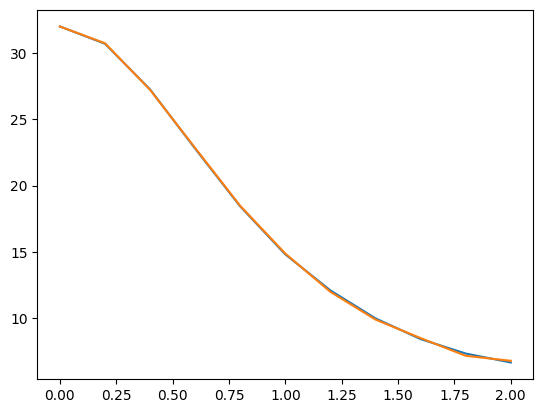

In [23]:
import matplotlib.pyplot as plt
from scipy import linalg
plt.plot(drift_time_evolution._time_space,[np.abs(linalg.eig(u - u_exc)[0]).max() for u,u_exc in zip(Us,U)], label='term grouping')
plt.plot(drift_time_evolution._time_space,[np.abs(linalg.eig(u - u_exc)[0]).max() for u,u_exc in zip(Us_orig,U)], label='original drift')
plt.legend()